In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import json
import folium

In [2]:
#Cargar datos
dfm = pd.read_csv("CoordMunicipios.csv", encoding = "ISO-8859-1")
dfe = pd.read_csv("CoordEstados.csv", encoding = "ISO-8859-1")
df = pd.read_csv("200504COVID19MEXICO.csv", encoding = "ISO-8859-1")

In [3]:
#Reemplace por  Nans y 0,1:
cols=["SEXO","RESULTADO","EPOC","EMBARAZO","INTUBADO","DIABETES","ASMA","INMUSUPR","HIPERTENSION",'OTRA_COM','CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO','UCI']
df[cols]=df[cols].replace([3,97,98,99],np.nan)
df[cols]=df[cols].replace(2,0)

In [4]:
#Creo columna MUERTES: Muertes 0,1(1=Muerte)
lista_def=[]
for i in df["FECHA_DEF"]:
    if i=="9999-99-99":
        lista_def.append(0)
    else:
        lista_def.append(1)
df["MUERTES"]=lista_def

In [5]:
#Creo columna ENF: Con enferm!=0, Sin enferm=0
#NEUMONIA no entra
cols_enf=df[['EPOC','DIABETES','ASMA','INMUSUPR','HIPERTENSION',"EMBARAZO",
   'OTRA_COM','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO',]]
df['ENF'] = cols_enf.sum(axis=1)


In [6]:
#Cambio a date time cols fechas
df["FECHA_DEF"]= df["FECHA_DEF"].replace("9999-99-99",np.nan)
from datetime import datetime
cols_fechas=['FECHA_INGRESO', 'FECHA_SINTOMAS',"FECHA_DEF"]
df[cols_fechas]=df[cols_fechas].apply(pd.to_datetime, format="%d/%m/%Y")

In [7]:
#Ordeno por fechas
df2=df[(df["RESULTADO"]==1)&df["MUERTES"]==1]
df2=df2.sort_values(by='FECHA_DEF')
df2=df2.groupby("FECHA_DEF").count().iloc[:,1:2]
df2=df2.asfreq(freq="d")
df2

,ID_REGISTRO
FECHA_DEF,
2020-03-18,2.0
2020-03-19,NaN
2020-03-20,1.0
2020-03-21,NaN
2020-03-22,1.0
2020-03-23,1.0
2020-03-24,2.0
2020-03-25,2.0
2020-03-26,8.0


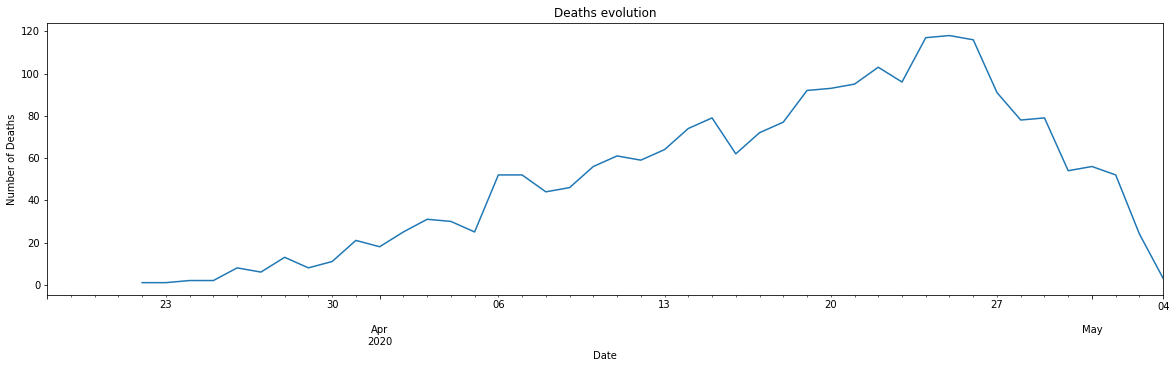

In [8]:
df2.ID_REGISTRO.plot(figsize=(20,5))
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.title("Deaths evolution")
plt.show()


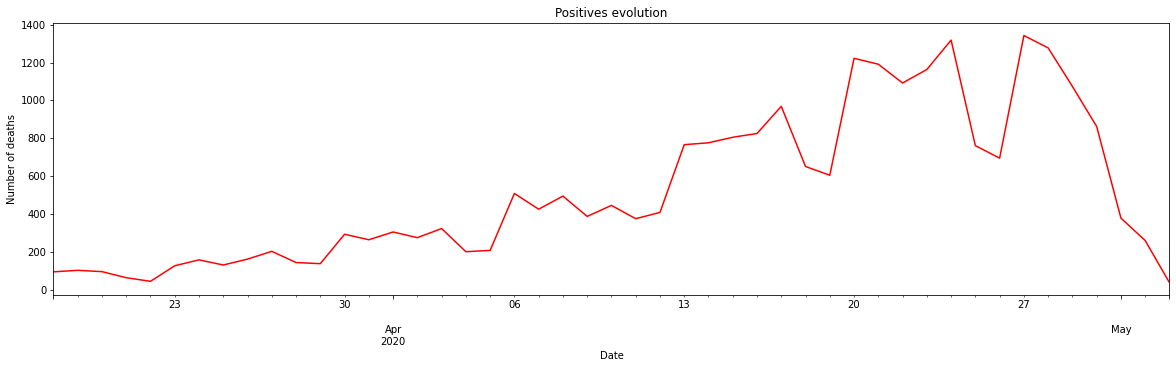

In [10]:
#Ordeno por fechas
df3=df[df["RESULTADO"]==1]
df3=df3.sort_values(by='FECHA_INGRESO')
df3=df3[df3["FECHA_INGRESO"]> "2020-03-17"]
df3=df3.groupby("FECHA_INGRESO").count().iloc[:,1:2]
df3=df3.asfreq(freq="d")
df3.ID_REGISTRO.plot(figsize=(20,5),color="red")
plt.xlabel("Date")
plt.ylabel("Number of deaths")
plt.title("Positives evolution")
plt.show()

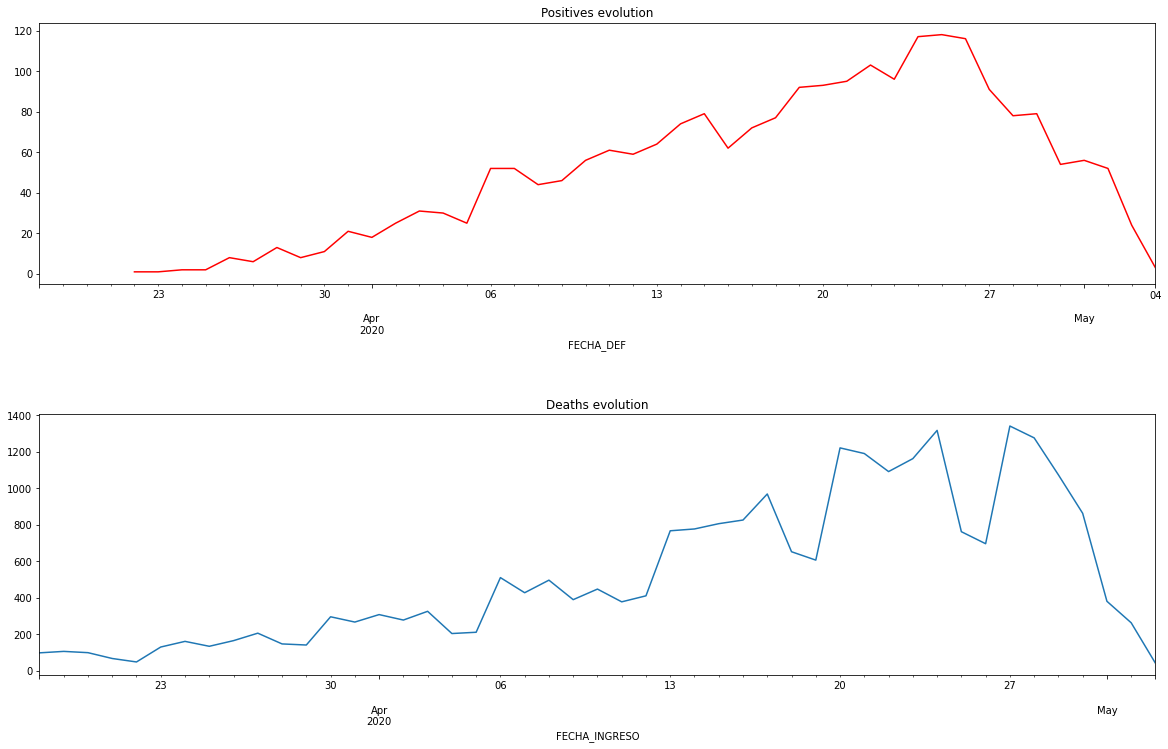

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,12))
plt.subplots_adjust(wspace=None, hspace=0.5)
df2.ID_REGISTRO.plot(ax=axes[0],title="Positives evolution",color="red")

df3.ID_REGISTRO.plot(ax=axes[1],title="Deaths evolution")

plt.show()

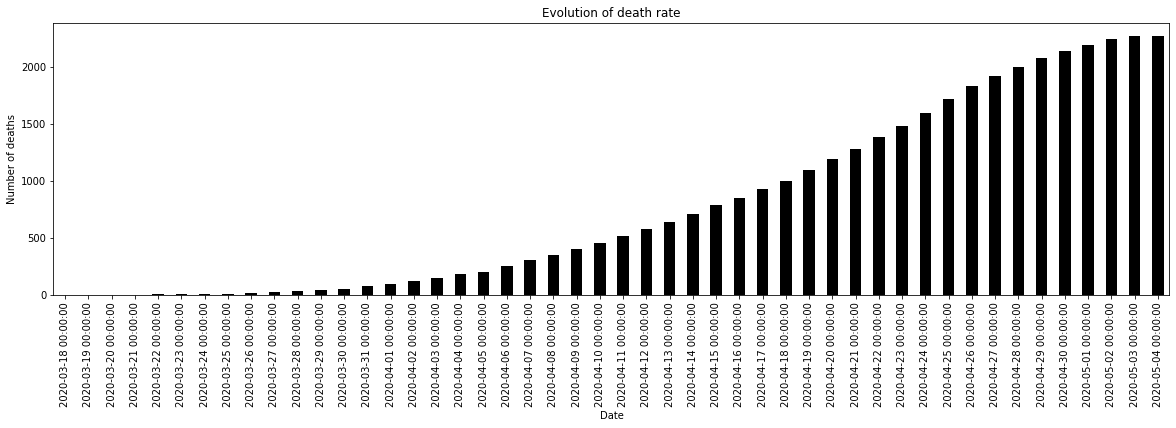

In [54]:
muertes=df2["ID_REGISTRO"]
total_m=muertes.cumsum()
df2["CUMSUM"]=total_m
df2.CUMSUM.plot(figsize=(20,5),kind="bar",color="black")
plt.xlabel("Date")
plt.ylabel("Number of deaths")
plt.title("Evolution of death rate")
plt.show()


In [ ]:
df_pos=df[(df["RESULTADO"]==1)&(df["FECHA_INGRESO"]>"2020-03-17")]
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df_pos['FECHA_INGRESO'], color = "red",edgecolor="black")
plt.title('Positives evolution',weight = "bold")
plt.xlabel('Date')
plt.ylabel('Number of positives')
#plt.annotate(xy =(15,18),xytext = (16,100), s = "COVID OUTBREAK", arrowprops = dict(arrowstyle ="-"))
x_dates = df_pos["FECHA_INGRESO"].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.savefig("Deaths evolution.jpg")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_def=df[(df["MUERTES"]==1)&df["RESULTADO"]==1]
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(df_def['FECHA_DEF'], color = "blue",edgecolor="black")
plt.title('Deaths evolution',weight = "bold")
plt.xlabel('Date')
plt.ylabel('Number of deaths')
#plt.annotate(xy =(15,18),xytext = (16,100), s = "COVID OUTBREAK", arrowprops = dict(arrowstyle ="-"))
x_dates = df_def["FECHA_DEF"].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.savefig("Deaths evolution.jpg")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df3=df[(df["MUERTES"]==1)&df["RESULTADO"]==1]
muertes = df3["FECHA_DEF"].value_counts()
total_muert = muertes.cumsum()

fig, ax = plt.subplots(figsize=(10,6))
plt.bar(range(len(total_muert)),total_muert,color="b")
plt.title('Evolution of death rate',weight = "bold")
plt.xlabel('Date')
plt.ylabel('Number of deaths')
x_dates = df["FECHA_DEF"].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels = x_dates, rotation=45, ha='right')
plt.savefig("Total death accumulation.jpg")
plt.show()
